# Linear Regression

**Topics Covered :**

- 5 Steps of Approaching a ML Problem :
    1. Training Data
    2. Model
    3. Loss Function
    4. Optimization
    5. Evaluation
- Optimization Techniques :
    - Gradient Descent
    - Mini Batch Gradient Descent
    - Stochastic Gradient Descent
- `LinReg` class to encapsulate all the code

In [196]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pprint

## 1. Training Data

In [237]:
# Initial parameters
w0 = 1
w1 = 2
n = 100
X = 10 * np.random.random(n,)

In [238]:
y = w0 + w1*X + np.random.random(n,)

In [239]:
print(f'Shape of feature matrix(X) is {X.shape}')
print(f'Shape of labels(y) is {y.shape}')

Shape of feature matrix(X) is (100,)
Shape of labels(y) is (100,)


In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Shape of X_train is {X_train.shape}')
print(f'Shape of X_test is {X_test.shape}')
print(f'Shape of y_train is {y_train.shape}')
print(f'Shape of y_test is {y_test.shape}')

Shape of X_train is (80,)
Shape of X_test is (20,)
Shape of y_train is (80,)
Shape of y_test is (20,)


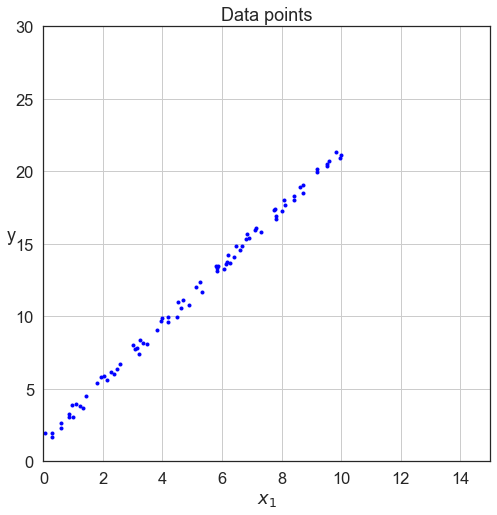

In [245]:
sns.set_style('white')
f = plt.figure(figsize=(8,8))
sns.set_context(context='notebook',font_scale=1.5,rc={"lines.linewidth":2.5})

plt.plot(X_train, y_train, "b.") #blue dots
plt.title("Data points")
plt.grid(True)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0,fontsize=18)
plt.axis([0,15,0, 30])  # Sets start/end of X and Y axis in the same order.

plt.show()



### Add Dummy Feature ( For the bias term )

In [246]:
def add_dummy_feature(X) :
    return np.column_stack((np.ones((X.shape[0])), X))

# testing the above function
train_matrix = np.array([[1,2,3], [4,5,6]]) # each feature is a 3-d vector.
train_matrix = add_dummy_feature(train_matrix)
train_matrix



array([[1., 1., 2., 3.],
       [1., 4., 5., 6.]])

In [247]:
X_train = add_dummy_feature(X_train)

## 2. Model

In [431]:
def predict(X, w) :
    if(X.shape[1] == w.shape[0]) :
        return X@w
    else :
        return None


def preprocess(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
    X_train = add_dummy_feature(X_train)
    return X_train, X_test, y_train, y_test

def generate_examples(n) :
    X = 10 * np.random.random(n, )
    y = w0 + w1 * X
    return preprocess(X, y)

## 3. Loss Function

In [430]:
def loss(X, y, w=None) :
    if(w is None) :
        w = np.zeros(X.shape[1])
    e = X @ w - y
    return 0.5 * (e.T @ e)

# loss(X, y,w)

# pprint.pprint(X)
# pprint.pprint(y)
# pprint.pprint(w)

array([4.68542259, 3.19662879])


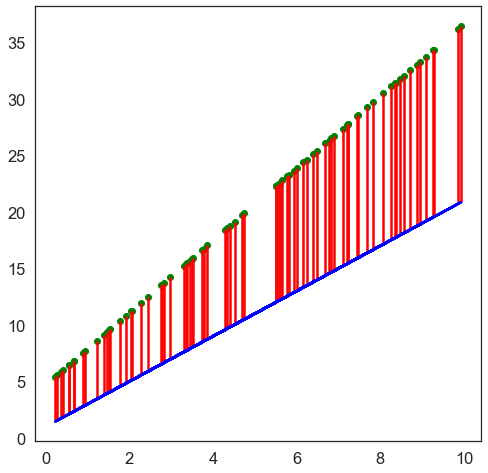

In [286]:
X_train, X_test, y_train, y_test = generate_examples(100)
w = 10 * np.random.rand(2,)
pprint.pprint(w)
# y_hat =  predict(X_train, w)
loss(X_train, y_train, w)
y_new = predict(X_train, w)

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(X_train[:,1], y_train, c='b', label='Training')
axes.scatter(X_train[:,1], y_new, c='g', label='Error')
axes.vlines(X_train[:,1], y_new, y_train, colors="r", label="loss")

In [287]:
def normal_equation(X, y) :
    return np.linalg.pinv(X) @ y

In [288]:
normal_equation(X_train, y_train)

array([1., 2.])

## 4. Optimization

In [432]:
t1, t2 = 200, 10000

# HELPER FUNCTIONS

def calculate_gradient(X, y, w) :
    return np.transpose(X) @ (predict(X, w) - y)

def weight_update(w, lr, grad) :
    return w - (lr * grad)

def learning_schedule(t):
    return t1 / (t + t2)


# GRADIENT DESCENT

def gradient_descent(X, y, epochs):
    losses = list() 
    weights = list()
    w = np.zeros(X.shape[1])
    for i in range(epochs):
        l = loss(X_train, y_train, w)
        losses.append(l)
        g = calculate_gradient(X, y, w)
        w = weight_update(w, lr, g)
        weights.append(w)
    return weights, losses
    
    


# MINI BATCH GRADIENT DESCENT

def mini_batch_gradient_descent(X, y, epochs, batch_size) :
    t = 0
    weights, losses = list(), list()
    w = np.zeros(X.shape[1])
    
    for e in range(epochs) :
        shuffled_indices = np.random.permutation(X.shape[0])
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, X.shape[0], batch_size) :
            t += 1
            x1 = X_shuffled[i:i+batch_size]
            y1 = y_shuffled[i:i+batch_size]
            l = loss(x1, y1, w)
            losses.append(l)
            
            grad =  calculate_gradient(x1, y1, w) * batch_size / 2
            lr = learning_schedule(t)
            w = weight_update(w, lr, grad)
            weights.append(w)
            
    return weights, losses




# STOCHASTIC GRADIENT DESCENT ( MBGD with batch_size = 1 )

def stochastic_gradient_descent(X, y, epochs) :
    t = 0
    w = np.zeros(X.shape[1])  #initializing arbitrary values.
    weights, losses = list(), list()
    
    for e in range(epochs):
        shuffled_indices = np.random.permutation(X.shape[0])
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, X.shape[0], mini_batch_size):
            t += 1
            x1 = X_shuffled[i:i+1]
            y1 = y_shuffled[i:i+1]

            l = loss(x1, y1, w)
            losses.append(l)

            g = 2/mini_batch_size * calculate_gradient(x1, y1, w)
            w = weight_update(w, learning_schedule(t), g)
            weights.append(w)

    return weights, losses

## 5. Evaluation

In [ ]:
def rmse(X, y, w) :
    n = X.shape[0] # No of the samples
    return np.sqrt(2/n * loss(X, y))

def plot_learning_curves(losses):
    plt.plot(losses)


### Learning Curve - GD  

array([4.28134169e-04, 4.28134169e-04, 4.28134169e-04, 4.28134169e-04,
       4.28134169e-04, 4.28134169e-04, 4.28134169e-04, 4.28134169e-04,
       4.28134169e-04, 4.28134169e-04, 4.00335625e+01, 1.03081976e+01,
       5.19092210e+01, 6.29242060e+00, 4.11619567e+01, 2.84422561e+01,
       8.89543118e+01, 9.75812006e+00, 1.54722339e+01, 4.49977648e+01])


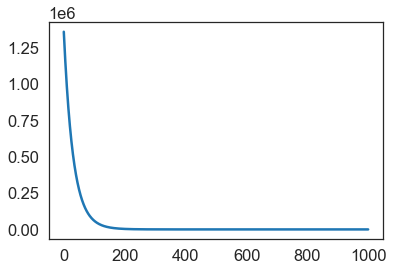

In [543]:
lr = 0.0001
epochs = 1000

weights, losses = gradient_descent(X_train, y_train, epochs)
pprint.pprint(weights[-1])
plot_learning_curves(losses)

### Learning Curve - MBGD  

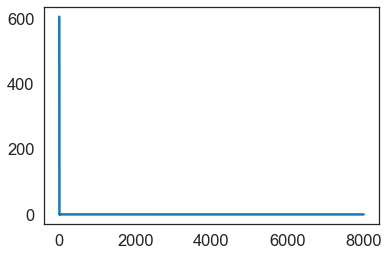

In [487]:
mini_batch_size = 10
iterations = 1000

X_train, X_test, y_train, y_test = generate_examples(100)
weights, losses = mini_batch_gd(X_train, y_train, iterations, mini_batch_size)
plot_learning_curves(losses)

### Learning Curve - SGD  

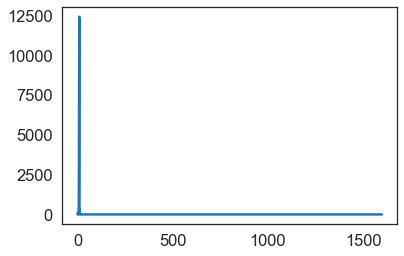

In [493]:
mini_batch_size = 1
iterations = 20

X_train, X_test, y_train, y_test = generate_examples(100)
weights, losses = stochastic_gradient_descent(X_train, y_train, iterations)
plot_learning_curves(losses)

## Handling More Features 

In [505]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [504]:
X, y, w = make_regression(n_samples=200, n_features=10, n_informative=10, n_targets=1, shuffle=True, coef=True, noise=0.5, random_state=0)
X = add_dummy_feature(X)
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [515]:
w_normal_eqn = normal_equation(X_train, y_train)
print("Weight vector found through normal equation : ", w_normal_eqn)

Weight vector found through normal equation :  [4.30868690e-04 4.30868690e-04 4.30868690e-04 4.30868690e-04
 4.30868690e-04 4.30868690e-04 4.30868690e-04 4.30868690e-04
 4.30868690e-04 4.30868690e-04 4.00335228e+01 1.03086790e+01
 5.19091277e+01 6.29286567e+00 4.11625781e+01 2.84422862e+01
 8.89543306e+01 9.75752481e+00 1.54723974e+01 4.49980952e+01]



Weight vector found through gradient descent :  [4.28134169e-04 4.28134169e-04 4.28134169e-04 4.28134169e-04
 4.28134169e-04 4.28134169e-04 4.28134169e-04 4.28134169e-04
 4.28134169e-04 4.28134169e-04 4.00335625e+01 1.03081976e+01
 5.19092210e+01 6.29242060e+00 4.11619567e+01 2.84422561e+01
 8.89543118e+01 9.75812006e+00 1.54722339e+01 4.49977648e+01]


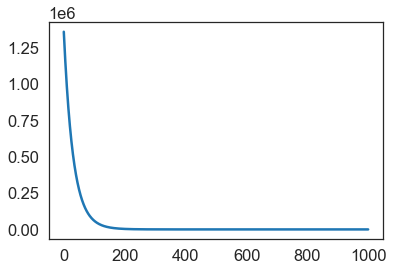

In [527]:
w_gd, losses = gradient_descent(X_train, y_train, 1000)
print("\nWeight vector found through gradient descent : ", w_gd[-1])
plot_learning_curves(losses)


Weight vector found through mini batch gradient descent :  [-5.02480045e+144 -5.02480045e+144 -5.02480045e+144 -5.02480045e+144
 -5.02480045e+144 -5.02480045e+144 -5.02480045e+144 -5.02480045e+144
 -5.02480045e+144 -5.02480045e+144  3.30242014e+143  6.21239022e+143
 -2.41675924e+144 -4.29006810e+143  4.35171094e+143  1.85742116e+144
  3.22200619e+143  4.61284149e+143 -1.25854964e+143  2.95605524e+144]


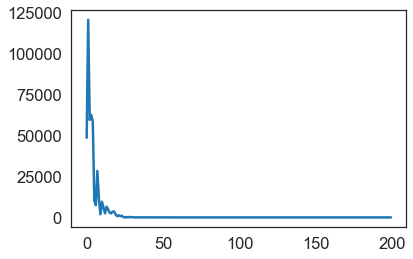

In [536]:
w_mgbd, losses = mini_batch_gradient_descent(X_train, y_train, 5, 4)
print("\nWeight vector found through mini batch gradient descent : ", w_mbgd[-1])
plot_learning_curves(losses)


Weight vector found through stochastic gradient descent :  [-6.19528990e-03 -6.19528990e-03 -6.19528990e-03 -6.19528990e-03
 -6.19528990e-03 -6.19528990e-03 -6.19528990e-03 -6.19528990e-03
 -6.19528990e-03 -6.19528990e-03  4.00820928e+01  1.03953676e+01
  5.20040740e+01  6.32980531e+00  4.12389330e+01  2.85060390e+01
  8.90627421e+01  9.72919750e+00  1.54915793e+01  4.49804095e+01]


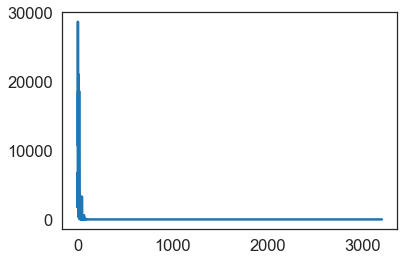

In [525]:
w_sgd, losses = stochastic_gradient_descent(X_train, y_train, 20)
print("\nWeight vector found through stochastic gradient descent : ", w_sgd[-1])
plot_learning_curves(losses)

## `LinReg()` - Class containing all the above methods

In [ ]:
class LinReg():
    def __init__(self):
        self.t0 = 200
        self.t1 = 100000
    
    def predict (self, X):
        y = X @ self.w
        return y
    
    def loss (self, X, y):
        e = y - self.predict(X)
        return 0.5 *(e.T @ e)
    
    def rmse(self,X, y):
        return np.sqrt(2/X.shape[0] * self.loss(X, y))
    
    def fit(self, X, y):
        self.w = np.linalg.pinv(X) @ y
        return self.w
    
    def calculate_gradient(self, X, y):
        return X.T @ (self.predict(X) - y)
    
    def update_weights(self, grad, lr):
        return (self.w - lr * grad)
    
    def learning_schedule(self, t):
        return self.t0 / (self.t0 + self.t1)
    
    def gd(self, X, y, num_epochs, lr):
        self.w = np.zeros(X.shape[1])
        self.w_all = list() 
        self.err_all = list()
        for i in range(epochs):
            dJdw = calculate_gradient(X, y)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y))
            self.w = self.update_weights(dJdw, lr)
        return self.w
    
    def mbgd(self, X, y, num_epochs, batch_size):
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initializing arbitrary values.
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w
    
    def sgd(self, X, y, num_epochs):
        batch_size = 1
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initializing arbitrary values.
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w

## Doubts and Clarifications

In [ ]:
np.random.seed(0)
x = 10 * np.random.random(10)
pprint.pprint(x)
s = np.random.permutation(10)
pprint.pprint(s)
x = x[s]
pprint.pprint(x)

In [215]:
a = np.array([[1,3,2,5],[1,9,4,7]])
b = np.array([2,1,0.1,1])
c = np.array([[2,1,0.1,1]])
print("A : ", a.shape)
print("B : ", b.shape)
print("C : ", c.T.shape)
pprint.pprint(c.T)
# print("b at a : ", a.T@b)
# print("c at a : ", c@a)

A :  (2, 4)
B :  (4,)
C :  (4, 1)
array([[2. ],
       [1. ],
       [0.1],
       [1. ]])
